In [3]:
from fastai.vision.all import *
import timm
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/Endometrial-Hyperplasia')

Mounted at /content/drive


In [4]:
from balance_dataset import balance_dataset
from augmentations import AlbumentationsTransform, get_albumentations
from dataloaders import dataloaders
from training.train_inceptionv3 import *

In [5]:
DATA_DIR = Path('/content/drive/MyDrive/eh_classification')

In [6]:
balance_dataset = balance_dataset(DATA_DIR, strategy='oversample')

Original class counts: {'Normal Endometrium': 1333, 'Endometrial Hyperplasia': 798}
Balanced dataset saved to: /content/balanced_data


In [7]:
import os

dataset_path = '/content/balanced_data'

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        file_count = 0
        for entry in os.listdir(class_path):
            if os.path.isfile(os.path.join(class_path, entry)):
                file_count += 1
        print(f"Class: {class_name}, Number of files: {file_count}")

Class: Endometrial Hyperplasia, Number of files: 1333
Class: Normal Endometrium, Number of files: 1333


In [18]:
transforms = AlbumentationsTransform(get_albumentations())

In [19]:
dls = dataloaders(balance_dataset, transforms)

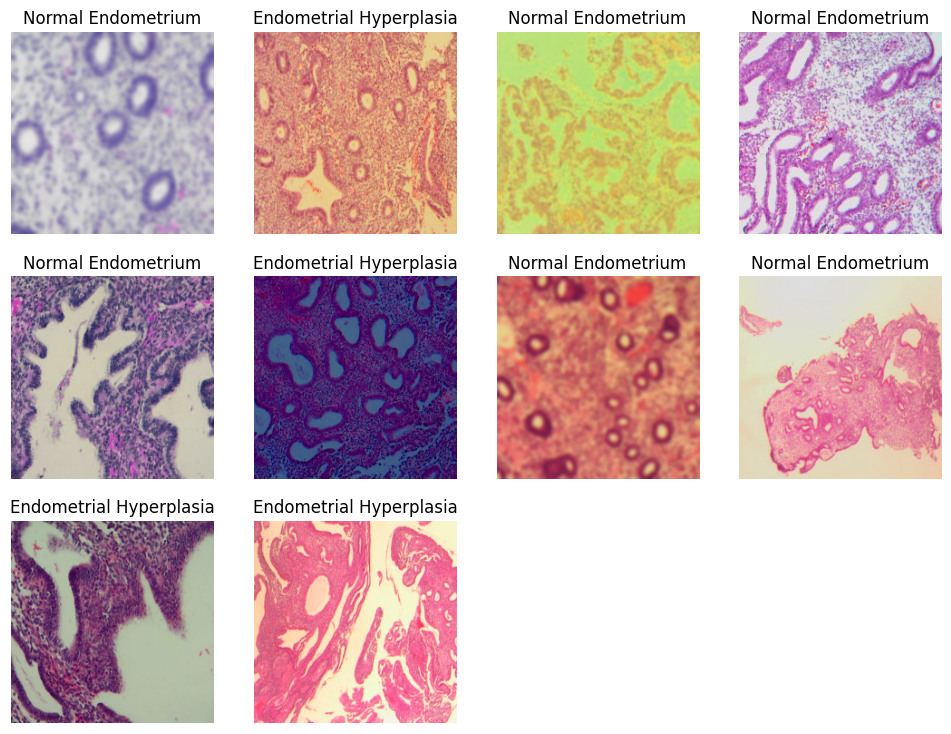

In [20]:
dls.show_batch(max_n=10)

In [21]:
from training.train_inceptionv3 import train_model

In [22]:
learn = train_model(dls)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/95.5M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0030199517495930195)

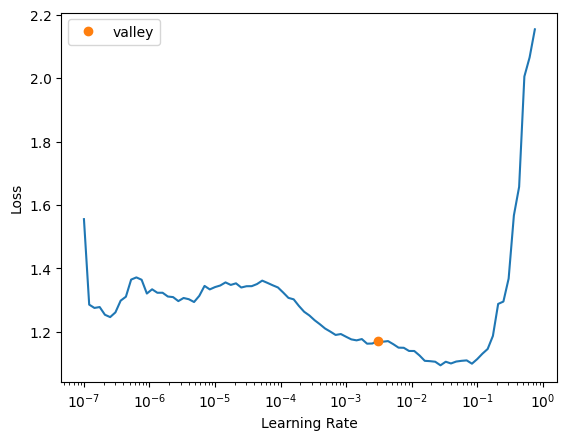

In [23]:
learn.lr_find()

In [24]:
learn.fit_one_cycle(20, 0.0030199517495930195)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.948803,0.615967,0.735955,0.737156,0.735955,0.735620,0.821726,00:18
1,0.899758,0.756912,0.737828,0.742231,0.737828,0.736631,0.821908,00:18
2,0.816351,0.593183,0.797753,0.798171,0.797753,0.797682,0.860049,00:19
3,0.711649,0.568354,0.760300,0.762792,0.760300,0.759730,0.834946,00:19
4,0.608699,0.418732,0.803371,0.806505,0.803371,0.802867,0.891603,00:18
5,0.546207,0.401470,0.810861,0.812127,0.810861,0.810670,0.901507,00:19
6,0.471449,0.396015,0.837079,0.840561,0.837079,0.836661,0.911221,00:18
7,0.437875,0.391174,0.812734,0.813015,0.812734,0.812692,0.905771,00:18
8,0.410630,0.373965,0.831461,0.832655,0.831461,0.831309,0.919518,00:19
9,0.391353,0.343745,0.853933,0.854251,0.853933,0.853900,0.929021,00:18


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.00010964782268274575)

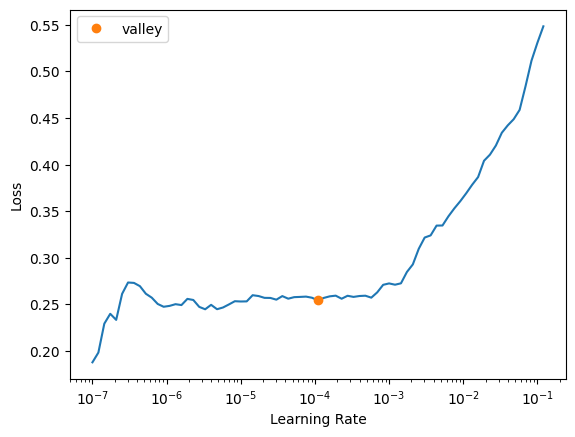

In [25]:
learn.unfreeze()
learn.lr_find()

In [26]:
learn.fit_one_cycle(20, 0.00010964782268274575)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.263400,0.293972,0.882023,0.882156,0.882022,0.882012,0.948996,00:21
1,0.248567,0.282182,0.878277,0.880202,0.878277,0.878123,0.953401,00:19
2,0.238608,0.252971,0.885768,0.885903,0.885768,0.885758,0.961733,00:20
3,0.235401,0.243195,0.895131,0.895486,0.895131,0.895108,0.966489,00:19
4,0.220622,0.215098,0.915730,0.915736,0.915730,0.915730,0.972478,00:19
5,0.201137,0.246272,0.904494,0.905456,0.904494,0.904438,0.968761,00:20
6,0.180839,0.209965,0.925094,0.929821,0.925094,0.924887,0.979850,00:19
7,0.159806,0.210754,0.926966,0.928318,0.926966,0.926909,0.976813,00:20
8,0.143415,0.198756,0.923221,0.923274,0.923221,0.923219,0.978461,00:19
9,0.123039,0.193919,0.930712,0.930718,0.930712,0.930711,0.979106,00:19


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=6.30957365501672e-05)

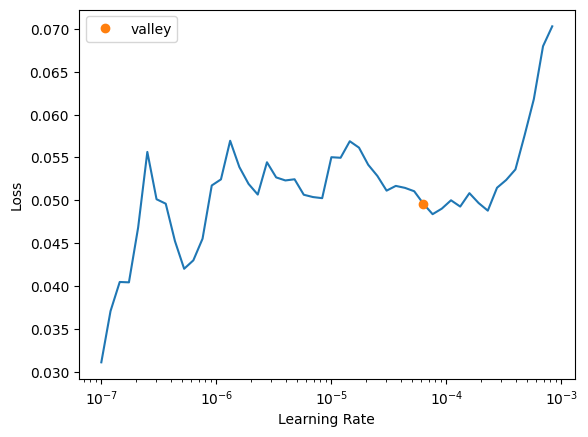

In [27]:
learn.unfreeze()
learn.lr_find()

In [28]:
learn.fit_one_cycle(20, 1e-5)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.059529,0.202753,0.936330,0.936550,0.936330,0.936322,0.982185,00:20
1,0.054568,0.200540,0.934457,0.934609,0.934457,0.934451,0.982410,00:19
2,0.049152,0.200768,0.932584,0.932681,0.932584,0.932580,0.982143,00:18
3,0.052971,0.195959,0.941948,0.942252,0.941948,0.941938,0.983434,00:20
4,0.050898,0.196345,0.938202,0.938356,0.938202,0.938197,0.983062,00:19
5,0.047829,0.194012,0.936330,0.936354,0.936330,0.936329,0.983125,00:19
6,0.045426,0.198636,0.938202,0.938701,0.938202,0.938185,0.983020,00:19
7,0.047648,0.195793,0.940075,0.940100,0.940075,0.940074,0.983363,00:19
8,0.047541,0.188559,0.941948,0.942450,0.941948,0.941931,0.984310,00:20
9,0.043970,0.186920,0.938202,0.938356,0.938202,0.938197,0.984864,00:18


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=6.30957365501672e-05)

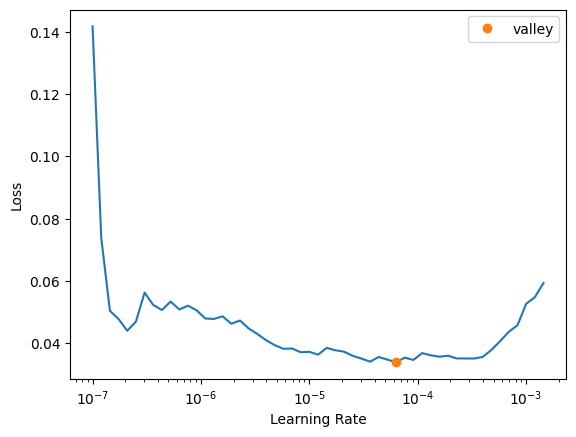

In [29]:
learn.unfreeze()
learn.lr_find()

In [30]:
learn.fit_one_cycle(20, slice(1e-5, 1e-4))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.036058,0.177420,0.936330,0.936354,0.936330,0.936329,0.985517,00:19
1,0.036746,0.184796,0.938202,0.938258,0.938202,0.938200,0.985033,00:19
2,0.041193,0.193451,0.940075,0.940075,0.940075,0.940075,0.984829,00:21
3,0.047148,0.182750,0.941948,0.942003,0.941948,0.941946,0.985468,00:18
4,0.040062,0.187996,0.940075,0.940075,0.940075,0.940075,0.985033,00:20
5,0.034994,0.190787,0.941948,0.942103,0.941948,0.941942,0.985201,00:19
6,0.035510,0.194267,0.947566,0.947666,0.947566,0.947563,0.985404,00:20
7,0.035484,0.198130,0.943820,0.943845,0.943820,0.943819,0.984282,00:19
8,0.031481,0.208498,0.945693,0.945699,0.945693,0.945693,0.983581,00:18
9,0.031142,0.206344,0.943820,0.943820,0.943820,0.943820,0.984472,00:20


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=2.0892961401841603e-05)

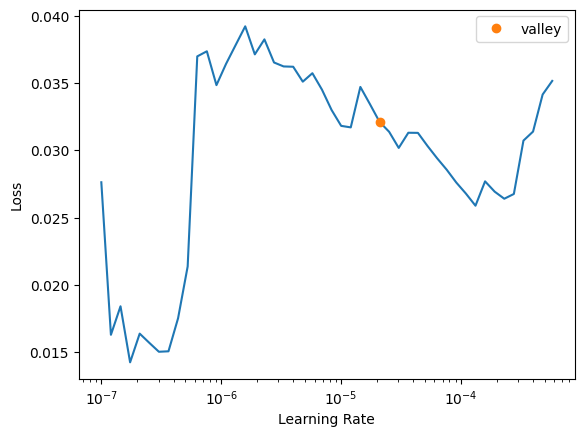

In [31]:
learn.unfreeze()
learn.lr_find()

In [32]:
learn.fit_one_cycle(20, slice(1e-5, 1e-4))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.029785,0.193021,0.943820,0.943845,0.943820,0.943819,0.986541,00:20
1,0.030011,0.192181,0.941948,0.941954,0.941948,0.941947,0.985931,00:19
2,0.029033,0.191998,0.945693,0.945699,0.945693,0.945693,0.986274,00:20
3,0.026720,0.209767,0.943820,0.943920,0.943820,0.943817,0.985285,00:19
4,0.024536,0.211580,0.943820,0.943845,0.943820,0.943819,0.985341,00:20
5,0.025946,0.202437,0.945693,0.945749,0.945693,0.945691,0.986029,00:19
6,0.025974,0.211764,0.940075,0.940075,0.940075,0.940075,0.985952,00:19
7,0.031180,0.213065,0.943820,0.943820,0.943820,0.943820,0.984402,00:20
8,0.030044,0.201742,0.947566,0.947591,0.947566,0.947565,0.986001,00:19
9,0.030255,0.204580,0.947566,0.947666,0.947566,0.947563,0.985566,00:20


In [33]:
learn.unfreeze()

SuggestedLRs(valley=1.2022644114040304e-05)

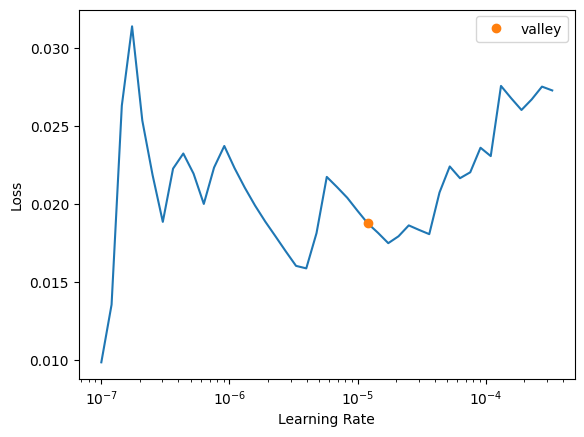

In [35]:
learn.lr_find()

In [36]:
learn.fit_one_cycle(20, slice(1e-5, 1e-4))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.024143,0.199207,0.947566,0.947566,0.947566,0.947566,0.986744,00:19
1,0.026224,0.195807,0.947566,0.947591,0.947566,0.947565,0.987165,00:19
2,0.026284,0.195185,0.951311,0.951336,0.951311,0.951310,0.987291,00:20
3,0.022979,0.197716,0.949438,0.949495,0.949438,0.949437,0.987235,00:19
4,0.024082,0.216245,0.943820,0.943845,0.943820,0.943819,0.986015,00:20
5,0.024721,0.220005,0.945693,0.945849,0.945693,0.945688,0.986295,00:19
6,0.020570,0.209129,0.945693,0.945749,0.945693,0.945691,0.987389,00:19
7,0.019425,0.206635,0.945693,0.945749,0.945693,0.945691,0.987459,00:19
8,0.022709,0.210515,0.947566,0.947666,0.947566,0.947563,0.986744,00:19
9,0.023972,0.212489,0.947566,0.947591,0.947566,0.947565,0.985811,00:20


In [38]:
learn.export('inceptionv3.pkl')